# Задача 1: закон тангенса в гравитационном поле

## Импорт библиотек

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
from matplotlib import pyplot as plt
from math import *

## Функции

In [62]:
def control(t): # Закон тангенса
    return atan(tg_theta - c * t)

def f(t, X):
    (x, y, vx, vy) = X
    u = control(t)
    return np.array((vx, vy, a*cos(u), a*sin(u)-g))

## Параметры

In [58]:
h = 300000 # Целевая высота, км 
m = 44413 # Масса ракеты, кг
a = 104 * 9806.65 / m # Удельная сила тяги, м/с^2
g = 9.80665 # Ускорение свободного падения, м/с^2

## Начальные данные

In [100]:

x0 = 0 # Начальная x-координата
y0 = 0 # Начальная y-координата
vx0 = 0 # Начальная x-компонента скорости
vy0 = 0 # Начальная y-компонента скорости

X0 = np.array([0, 0, 0, 0]) # Начальные фазовые переменные
t = 0 # Начальное время, с
T = 1000 # Конечное время, с

theta = np.deg2rad(45)
tg_theta = tan(theta)
c = 0.001

## Решение

In [104]:
Y = solve_ivp(f, [t, T], X0, method='RK45', atol=1e-9, rtol=1e-9)

## Отрисовка траектории

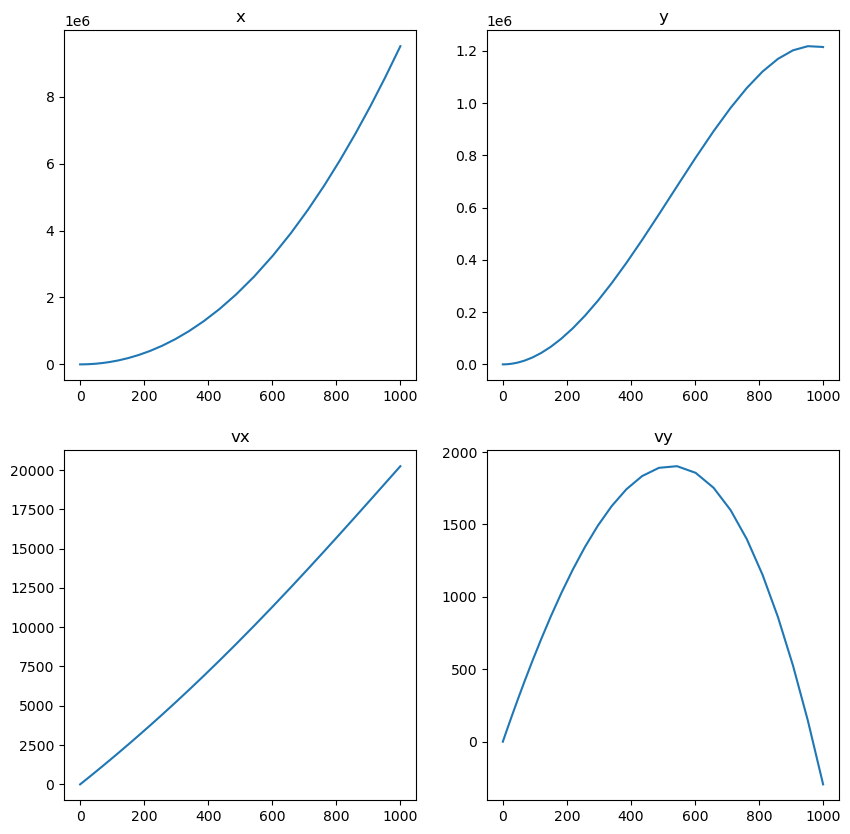

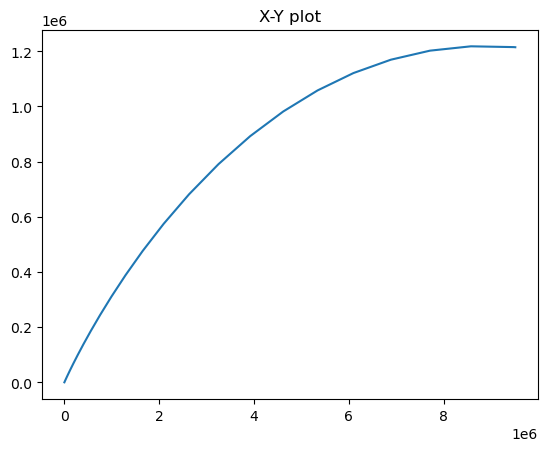

In [105]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].plot(Y.t, Y.y[0,:])
ax[0][0].set_title('x')
ax[0][1].plot(Y.t, Y.y[1,:])
ax[0][1].set_title('y')
ax[1][0].plot(Y.t, Y.y[2,:])
ax[1][0].set_title('vx')
ax[1][1].plot(Y.t, Y.y[3,:])
ax[1][1].set_title('vy')
plt.show()

figXY, axXY = plt.subplots()
axXY.plot(Y.y[0,:], Y.y[1,:])
axXY.set_title('X-Y plot')
plt.show()